<a href="https://colab.research.google.com/github/Alitariq747/FoodVision101-PyTorch-Image-Classification-Problem/blob/main/PyTorch_custom_datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pytorch Custom Datasets

How do you get your own data into PyTorch ?

One way to do it is via Custom DAtasets.

## Depending on what problem you are working on :
you can look into different domain libraries of Pytorch for vision, text, audio and recommendation as well as data.

## Importing PyTorch and setting up device-agnostic code.

In [ ]:
import torch
from torch import nn



In [ ]:
# Setup device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

## 1. Get data

Our dataset is a subset of Food101 dataset.

Food101 starts 101 different classes of food and 1000 images per class (750 training, 250 testing)

Our dataset for this exercise contains only 10% of the original data with 3 classes of food.

Why do this ?

When starting **ML** projects, its important to try things on a small scale and then increase the scale when neccessary.
The whole point is to speed up how fast you can experiment.

In [ ]:
import requests
import zipfile
from pathlib import Path

# Setup path a data folder
data_path = Path('data/')
image_path = data_path / 'pizza_steak_sushi'

# If the image doesnot exist, downlaod it and prepare it...
if image_path.is_dir():
  print(f'{image_path} already exists...; skipping download')
else:
  print(f'{image_path} doesnot exist; creating one...')
  image_path.mkdir(parents=True, exist_ok=True)

  # Download pizza, steak and sushi data
  with open(data_path / 'pizza_steak_sushi.zip', 'wb') as f:
    request = requests.get('https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip')
    print('Downloading pizza steak and sushi data...')
    f.write(request.content)

# Unzip pizza, steak and sushi data
with zipfile.ZipFile(data_path / 'pizza_steak_sushi.zip') as zip_ref:
  print('Unzipping pizza, steak and sushi data...')
  zip_ref.extractall(image_path)

data/pizza_steak_sushi doesnot exist; creating one...
Unzipping pizza, steak and sushi data...


## 2. Data preparation and data exploration

In [ ]:
import os
def walk_through_dir(dir_path):
  """
  Walks through dir_path returning its content
  """
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f'There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}.')

In [ ]:
walk_through_dir(image_path)

There are 2 directories and 0 images in data/pizza_steak_sushi.
There are 3 directories and 0 images in data/pizza_steak_sushi/test.
There are 0 directories and 31 images in data/pizza_steak_sushi/test/sushi.
There are 0 directories and 25 images in data/pizza_steak_sushi/test/pizza.
There are 0 directories and 19 images in data/pizza_steak_sushi/test/steak.
There are 3 directories and 0 images in data/pizza_steak_sushi/train.
There are 0 directories and 72 images in data/pizza_steak_sushi/train/sushi.
There are 0 directories and 78 images in data/pizza_steak_sushi/train/pizza.
There are 0 directories and 75 images in data/pizza_steak_sushi/train/steak.


In [ ]:
# Setup train and testing paths
train_dir = image_path / 'train'
test_dir = image_path / 'test'

train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

An important thing to note here is that for image/audio/video/text classification problems; your data must follow a certain **Directory** structure.

Now what this means is that all your train images must be in a separate directory called train inside the root directory and then each train image for a particular class must be in a separate folder with folder being the name of the class itself.

So in our case we have separate folders for test and train and then each of them have separate folders for images of pizza, steak and sushi respectively.

### Visualising an image

Let's write some code to:
1. Get all of the image paths
2. Pick a random image path using Python's random.choice()
3. Get the image class name using `pathlib.Path.parent.stem`
4. Since we're working with images, lets open the image with Python's PIL
5. We'll then show the image and print metadata.

In [ ]:
image_path

PosixPath('data/pizza_steak_sushi')

Random image path: data/pizza_steak_sushi/train/sushi/2720223.jpg
Random Image class name: sushi
Image height: 512
Image width: 512


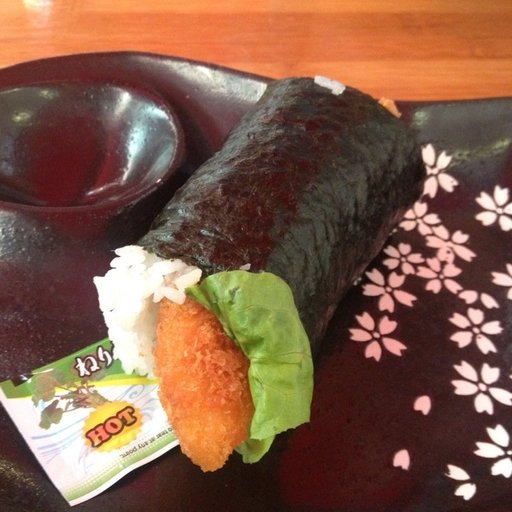

In [ ]:
import random
from PIL import Image

# Set see
# random.seed(42)

# 1. Get all image paths
image_path_list = list(image_path.glob('*/*/*.jpg'))
# image_path_list[:5]

# 2. Pick a random image path
random_image_path = random.choice(image_path_list)

# 3. Get image class from the path name (the image class is the name of the directory where the image lives)
image_class = random_image_path.parent.stem

# 4. Open Image
img = Image.open(random_image_path)

# 5. Print some metadata
print(f'Random image path: {random_image_path}')
print(f'Random Image class name: {image_class}')
print(f'Image height: {img.height}')
print(f'Image width: {img.width}')
img

(-0.5, 511.5, 511.5, -0.5)

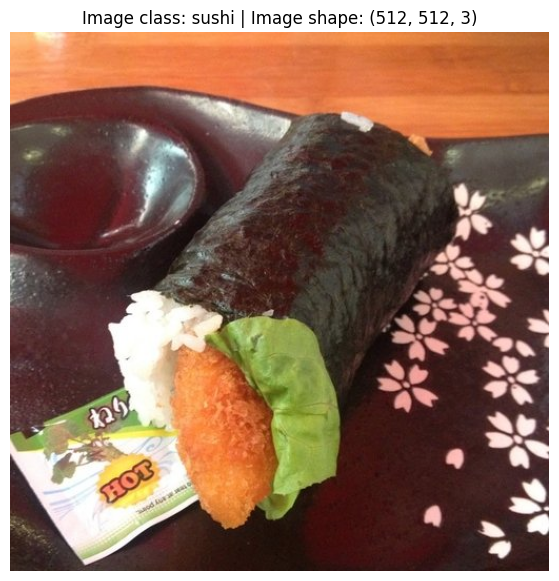

In [ ]:
# Try to visualize an image with matplotlib
import numpy as np
import matplotlib.pyplot as plt

# Turn the image into an array
img_as_array = np.asarray(img)

# Plot the image with matplotlib

plt.figure(figsize=(10,7))
plt.imshow(img_as_array)
plt.title(f'Image class: {image_class} | Image shape: {img_as_array.shape}')
plt.axis(False)

## 3. Trasforming Data

Before we can use our image data with PyTorch

1. Turn your target data into tensors(in our case, numerical representation of the image data)
2. Turn into a `torch.utils.data.Dataset` and subsequently `torch.utils.data.DataLoader.`

In [ ]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

### Transforming data with `torchvision.transforms.`
What this means is that we transform our jpg images into tensors...

In [ ]:
# Write a data transform for image
data_transform = transforms.Compose([
    # Resize our images to 64 x 64
    transforms.Resize(size=(64,64)),
    # Flip the images randomly on the horizontal
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

In [ ]:
data_transform(img)

tensor([[[0.7020, 0.7098, 0.7137,  ..., 0.9882, 0.9961, 0.9961],
         [0.6902, 0.7020, 0.7059,  ..., 0.9922, 0.9922, 0.9922],
         [0.6667, 0.6745, 0.6745,  ..., 0.9804, 0.9804, 0.9843],
         ...,
         [0.2039, 0.2039, 0.2118,  ..., 0.2235, 0.2039, 0.2118],
         [0.1804, 0.1804, 0.1961,  ..., 0.2000, 0.1961, 0.2039],
         [0.1843, 0.1882, 0.1922,  ..., 0.1961, 0.2000, 0.2157]],

        [[0.3882, 0.3961, 0.4078,  ..., 0.7490, 0.7294, 0.7294],
         [0.3725, 0.3804, 0.3882,  ..., 0.6863, 0.6980, 0.7020],
         [0.3490, 0.3569, 0.3569,  ..., 0.6275, 0.6431, 0.6549],
         ...,
         [0.1137, 0.1216, 0.1255,  ..., 0.1490, 0.1373, 0.1373],
         [0.1020, 0.1020, 0.1098,  ..., 0.1412, 0.1412, 0.1373],
         [0.0980, 0.1020, 0.0980,  ..., 0.1412, 0.1451, 0.1490]],

        [[0.1765, 0.1961, 0.2000,  ..., 0.4941, 0.4784, 0.4824],
         [0.1725, 0.1882, 0.1922,  ..., 0.4392, 0.4471, 0.4510],
         [0.1529, 0.1686, 0.1725,  ..., 0.3843, 0.3961, 0.

In [ ]:
data_transform(img).shape

torch.Size([3, 64, 64])

Look how our image has transformed so easily using the transforms module from torch vision.

In [ ]:
image_path_list[:5]

[PosixPath('data/pizza_steak_sushi/test/sushi/2276986.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/1987407.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/1742201.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/2715127.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/2394442.jpg')]

In [ ]:
def plot_transformed_images(image_paths: list, transform, n=3, seed=None):
  """
  Selects random images from image path and loads/transforms them then plot the original and transformed version.
  """
  if seed:
    random.seed(seed)
  random_image_paths = random.sample(image_paths, k=n)
  for image_path in random_image_paths:
    with Image.open(image_path) as f:
      fig, ax = plt.subplots(nrows=1, ncols=2)
      ax[0].imshow(f)
      ax[0].set_title(f'Original\nSize: {f.size}')
      ax[0].axis(False)

      # Transform and plot target image
      transformed_image = transform(f).permute(1,2,0) # (C,H,W) -> (H,W,C)
      ax[1].imshow(transformed_image)
      ax[1].set_title(f'Transformed\nShape: {transformed_image.shape}')
      ax[1].set_axis_off()

      fig.suptitle(f'Class: {image_path.parent.stem}', fontsize=16)
      plt.show()



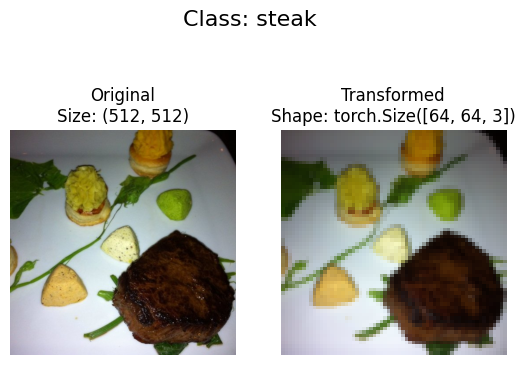

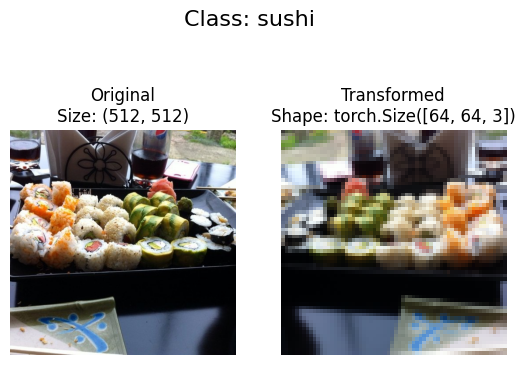

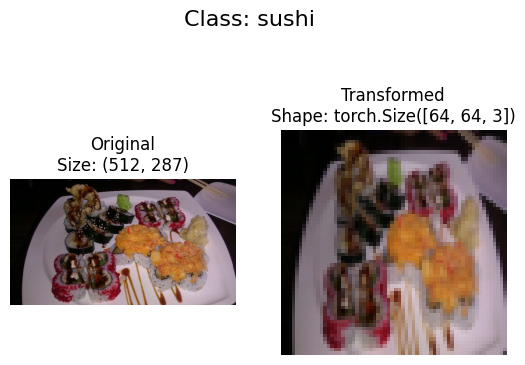

In [ ]:
plot_transformed_images(image_paths=image_path_list,
                        transform=data_transform,
                        seed=42, n=3)

Note that transforming the images have resulted in actually pixalating our images which can be a problem for our model in finding patterns in data. Remember that image size is a hyperparameter; you can tune it to suit your own projects.

#### Now lets move on to transforming our entire data into tensors

## 4. Option 1: Loading image data using `ImageFolder`

We can load image classification data using `torchvision.datasets.ImageFolder`

We use this ImageFolder as a helper function to turn our entire data into tensors and apply our transform function.

In [ ]:
train_dir

PosixPath('data/pizza_steak_sushi/train')

In [ ]:
from torchvision import datasets
train_data = datasets.ImageFolder(root=train_dir,
                                  transform=data_transform)

test_data = datasets.ImageFolder(root=test_dir,
                                 transform=data_transform)

train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [ ]:
# Get class names as list
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [ ]:
# Get class names as dictionary
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [ ]:
# Chekc the lengths of our datasets
len(train_data), len(test_data)

(225, 75)

In [ ]:
# Check something else
train_data.samples[0]

('data/pizza_steak_sushi/train/pizza/1008844.jpg', 0)

In [ ]:
# Have a look at any image
img, label = train_data[0][0], train_data[0][1]
print(f'Image tensor:\n {img}')
print(f'Image shape: {img.shape}')
print(f'Image datatype: {img.dtype}')
print(f'Image label: {class_names[label]}')
print(f'Label datatype: {type(label)}')

Image tensor:
 tensor([[[0.1137, 0.1020, 0.0980,  ..., 0.1255, 0.1216, 0.1176],
         [0.1059, 0.0980, 0.0980,  ..., 0.1294, 0.1294, 0.1294],
         [0.1020, 0.0980, 0.0941,  ..., 0.1333, 0.1333, 0.1333],
         ...,
         [0.1098, 0.1098, 0.1255,  ..., 0.1686, 0.1647, 0.1686],
         [0.0902, 0.0941, 0.1098,  ..., 0.1686, 0.1647, 0.1686],
         [0.0863, 0.0863, 0.0980,  ..., 0.1686, 0.1647, 0.1647]],

        [[0.0745, 0.0706, 0.0745,  ..., 0.0588, 0.0588, 0.0588],
         [0.0745, 0.0706, 0.0745,  ..., 0.0627, 0.0627, 0.0627],
         [0.0706, 0.0745, 0.0745,  ..., 0.0706, 0.0706, 0.0706],
         ...,
         [0.1255, 0.1333, 0.1373,  ..., 0.2510, 0.2392, 0.2392],
         [0.1098, 0.1176, 0.1255,  ..., 0.2510, 0.2392, 0.2314],
         [0.1020, 0.1059, 0.1137,  ..., 0.2431, 0.2353, 0.2275]],

        [[0.0941, 0.0902, 0.0902,  ..., 0.0157, 0.0196, 0.0196],
         [0.0902, 0.0863, 0.0902,  ..., 0.0196, 0.0157, 0.0196],
         [0.0902, 0.0902, 0.0902,  ..., 0.0

Original shape: torch.Size([3, 64, 64])
Image Permute: torch.Size([64, 64, 3])


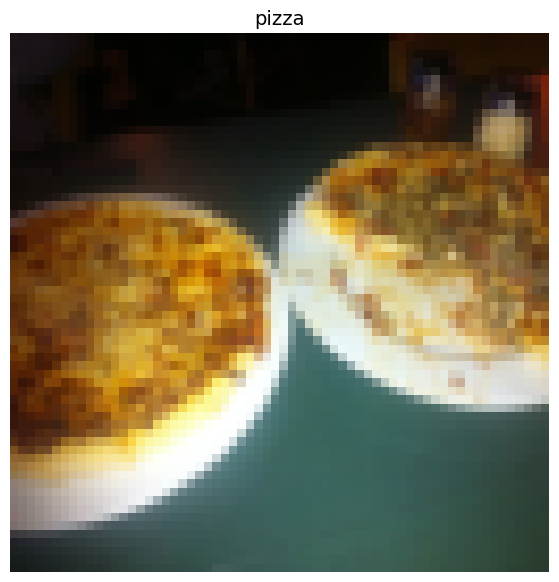

In [ ]:
# Lets plot this image using matplotlib
# First lets change the shape for matplotlib from (C,H,W) -> (H,W,C)
img_permute = img.permute(1,2,0)

# Print out different shapes
print(f'Original shape: {img.shape}')
print(f'Image Permute: {img_permute.shape}')

# Plot the image
plt.figure(figsize=(10,7))
plt.imshow(img_permute)
plt.axis(False)
plt.title(class_names[label], fontsize=14);

### 4.1 Turn loaded images into `DataLoaders`

A `DataLoader` is going to help us turn our `Datasets` into python iterables and we can customize the batch_size so our model can see `batch_size` images at a time.

In [ ]:
import os
os.cpu_count()

2

num_workers in DataLoader are number of cpu's our Dataloader can use. By default colab provides us with 2 so we are using 1 here.

In [ ]:
# Turn our train and test datasets into DataLoaders
from torch.utils.data import DataLoader
BATCH_SIZE=1
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              num_workers=1,
                              shuffle=True)
test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             num_workers=1,
                             shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x79318a1a39d0>,
 <torch.utils.data.dataloader.DataLoader at 0x79318a1a34c0>)

In [ ]:
len(train_dataloader), len(test_dataloader)

(225, 75)

##### Lets see how an image looks look inside of a dataloader. The main idea is to look at the shapes of indiviual pieces of data in our dataloader.

In [ ]:
img, label = next(iter(train_dataloader))

# Batch size will now be 1, you ca change it later
print(f'Image shape: {img.shape} (B,C,H,W)')
print(f'Lable shape: {label.shape}')

Image shape: torch.Size([1, 3, 64, 64]) (B,C,H,W)
Lable shape: torch.Size([1])


## 5. Option 2: Loading Image Data with a custom `Dataset`

Now `Dataset` here refers to the helper function that we would built just like ImageFolder capable of getting us our required data.

**Features that it should have**
1. Want to be able to load images from a file
2. Want to be able to get class names from the Dataset
3. Want to be able to get classes as dictionary

Pros:
* Can create a `Dataset (helper function)` out of almost anything
* Not limited to PyTorch built in `Dataset` functions

Cons:
* Even though you could create `Dataset` out of almost anything; it doesnot mean it will work..
* Using a custom `Dataset` often results in us writing more code, which could be prone to errors or performance issues.

##### All custom datasets in PyTorch often subclass torch.utils.data.Dataset to create their own Dataset helper functions to get the data.

In [ ]:
import os
import pathlib
import torch

from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple, Dict, List

In [ ]:
# Instance of torchvision.datasets.ImageFolder
train_data.classes, train_data.class_to_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

We want to replicate what ImageFolder does for us with just the path to the directory.

### 5.1 Creating a helper function to get class names

We want a function to:
1. Get the class names using `os.scandir()` to traverse a target directory (ideally the directory is in standard mutli class classification directory format.)
2. Raise an error if the class names aren't found (if this happens, there might be something wrong with the directory)
3. Turn the class names into a dict and a list and return them.

In [ ]:
# Setup path for target directory
target_directory = train_dir
print(f'Target dir: {target_directory}')

# Get the class names from the target directory
class_names_found = sorted(entry.name for entry in list(os.scandir(target_directory)))
class_names_found

Target dir: data/pizza_steak_sushi/train


['pizza', 'steak', 'sushi']

In [ ]:
def find_classes(directory: str) -> Tuple[list[str], Dict[str, int]]:
  """
  Finds the class folder names in a target directory
  """
  # 1. Get the class names by scanning the target directory
  classes = sorted(entry.name for entry in os.scandir(directory)if entry.is_dir())

  # 2. Raise an error if class names could not be found
  if not classes:
    raise FileNotFoundError(f'Could not find any classes in {directory}... Please check file structure')

  # 3. Create a dictionary on index labels(computers prefer numbers rather than stringas labels)
  class_to_idx = {class_name:i for i,class_name in enumerate(classes)}
  return classes, class_to_idx

In [ ]:
find_classes(target_directory)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

### 5.2 Create a custom `Dataset` to replicate `ImageFolder`

To create our won custom dataset, we want to:
1. Subclass torch.utils.data.Dataset
2. Init our subclass with a target directory (the directory we would like to get data from) as well as a transform if we would like to transform our data.
3. Create several attributes
 * paths - paths of our images
 * transform - the transform we'd like to use
 * classes - a list of target classes
 * class_to_idx - a dict of the target classes mapped to integer labels
4. Create a function to load_images(), this function will open an image
5. Overwrite the __len__ method to return the lenght of our dataset
6. Overwrite the __getitem()__ method to return a given sample when passed an index.

In [ ]:
# 0. Write a custom dataset class
from torch.utils.data import Dataset

# 1. Subclass Dataset from torch.utils.data
class ImageFolderCustom(Dataset):
  # 2. Initialize our custom dataset
  def __init__(self,
               tar_dir: str,
               transform=None):
    # 3. Create class attributes
    # Get all of our image paths
    self.paths = list(pathlib.Path(tar_dir).glob('*/*.jpg'))
    # Setup transform
    self.transform = transform
    # Create classes and class_to_idx attributes
    self.classes, self.class_to_idx = find_classes(tar_dir)

  # 4. Create a function to load images
  def load_image(self, index: int) -> Image.Image:
    """
    Open an image via a path and returns it
    """
    image_path = self.paths[index]
    return Image.open(image_path)

  # 5. Overwrite __len__()
  def __len__(self) -> int:
    """
    Return the total number of samples
    """
    return len(self.paths)

  # 6. Overwrite the __getitem__() method to return a particular sample
  def __getitem__(self, index:int) -> Tuple[torch.Tensor, int]:
    """
    Returns one sample of data, data and label (X, y)
    """
    img = self.load_image(index)
    class_name = self.paths[index].parent.name # expects path in format: data_folder/class_name/image.jpg
    class_idx = self.class_to_idx[class_name]

    # Transform if necessary
    if self.transform:
      return self.transform(img), class_idx # return data, label (X, y)
    else:
      return img, class_idx # returned untransformed image and label

In [ ]:
# Create a transform
from torchvision import transforms
train_transforms = transforms.Compose([transforms.Resize(size=(64,64)),
                                       transforms.RandomHorizontalFlip(p=0.5),
                                       transforms.ToTensor()])

test_transforms = transforms.Compose([transforms.Resize(size=(64,64)),
                                      transforms.ToTensor()])

In [ ]:
# Test our ImageFolderCustom
train_data_custom = ImageFolderCustom(tar_dir=train_dir,
                                      transform=train_transforms)
test_data_custom = ImageFolderCustom(tar_dir=test_dir,
                                     transform=test_transforms)

In [ ]:
train_data_custom, test_data_custom

(<__main__.ImageFolderCustom at 0x79318a1b6da0>,
 <__main__.ImageFolderCustom at 0x79318a1b6e60>)

In [ ]:
len(train_data), len(train_data_custom)

(225, 225)

In [ ]:
len(test_data), len(test_data_custom)

(75, 75)

In [ ]:
train_data_custom.classes

['pizza', 'steak', 'sushi']

In [ ]:
train_data_custom.class_to_idx

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [ ]:
# Check for equality between original ImageFolder and ImageFolderCustom
print(train_data_custom.classes == train_data.classes)
print(test_data.classes == test_data_custom.classes)

True
True


### 5.3 Creating a function to display random images

1. Take a `Dataset` and a number of other parameters such as class names and how many images to visualize.
2. To prevent the display getting out of hand, let's cap the number of images to see a 10.
3. Set the random seed for reproducibility
4. Get a list of random sample indexes from the target dataset.
5. Setup a matplotlib plot
6. Loop through the random sample indexes from the target dataset and plot the images using matplotlib
7. Make sure the dimensions of our images line up with matplotlib(HWC)


In [ ]:
# 1. Create a function to take in a dataset
def display_random_images(dataset: torch.utils.data.Dataset,
                          classes: List[str] = None,
                          n: int = 10,
                          display_shape: bool = True,
                          seed: int = None):
  # 2. Adjust display if n is too high
  if n > 10:
    n = 10
    display_shape = False
    print(f'For display, purposes, n shoudln"t be larger than 10, setting to 10 and removing shape display.')

  # 3. Set the seed
  if seed:
    random.seed(seed)

  # 4 Get the random sample indexes
  random_sample_idx = random.sample(range(len(dataset)), k=n)

  # 5. Setup plot
  plt.figure(figsize=(16,8))


  # 6 Loop through random indexes and plot them with matplotlib
  for i, target_sample in enumerate(random_sample_idx):
    target_image, target_label = dataset[target_sample][0], dataset[target_sample][1]

    # 7. Adjust tensor dimension for plotting with matplotlib
    targ_image_adjust = target_image.permute(1,2,0)

    # Plot adjusted images
    plt.subplot(1, n, i+1)
    plt.imshow(targ_image_adjust)
    plt.axis('off')
    if classes:
      title = f'Class: {classes[target_label]}'
      if display_shape:
        title = title + f'\nshape: {targ_image_adjust.shape}'
    plt.title(title)

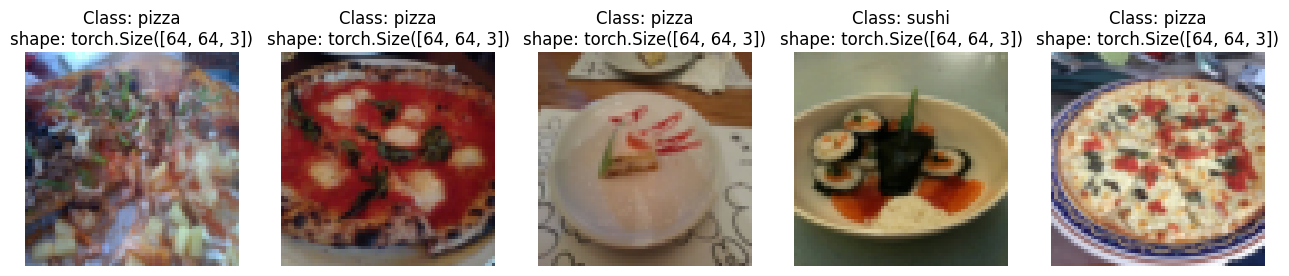

In [ ]:
# Display random images from the ImageFolder created dataset
display_random_images(train_data,
                     n=5,
                     classes=class_names,
                     seed=None)

For display, purposes, n shoudln"t be larger than 10, setting to 10 and removing shape display.


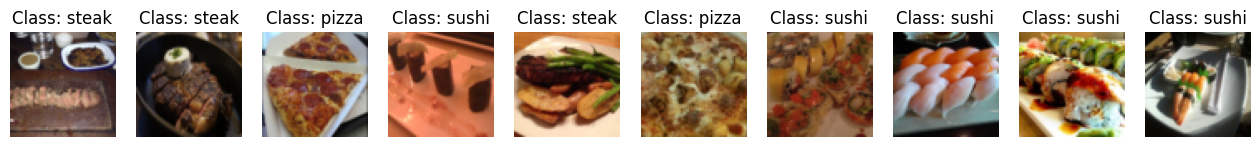

In [ ]:
# Display random images from the ImageFolderCustom created dataset
display_random_images(train_data_custom,
                      classes=class_names,
                      n=20,
                      seed=None)

### 5.4 Turn custom loaded images into `DataLoader's`

In [ ]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()
train_dataloader_custom = DataLoader(dataset=train_data_custom,
                                     batch_size=BATCH_SIZE,
                                     num_workers=NUM_WORKERS,
                                     shuffle=True)
test_dataloader_custom = DataLoader(dataset=test_data_custom,
                                    batch_size=BATCH_SIZE,
                                    num_workers=NUM_WORKERS,
                                    shuffle=False)

train_dataloader_custom, test_dataloader_custom


(<torch.utils.data.dataloader.DataLoader at 0x79318a30c490>,
 <torch.utils.data.dataloader.DataLoader at 0x79318a30de40>)

In [ ]:
# Get image and label from custom dataloader
img_custom, label_custom = next(iter(train_dataloader_custom))
img_custom.shape, label_custom.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

## 6. Other forms of transforms (data augmentation)

Data augmentation is the process of artificially adding diversity to your training data.

In the case of image data, this may mean applying various image transformations to the training images. such as rotate, crop, grayscale , nightmode etc.

This practice hopefully results in a model that more generalizable to unseen data.

Let's take a look at one particular type of data augmentation used to train PyTorch vision models to state of the art levels.



In [ ]:
# Let's look at trivialaugment

from torchvision import transforms
train_transform = transforms.Compose([transforms.Resize(size=(224,224)),
                                       transforms.TrivialAugmentWide(num_magnitude_bins=31),
                                       transforms.ToTensor()])
test_transform = transforms.Compose([transforms.Resize(size=(224,224)),
                                     transforms.ToTensor()])

In [ ]:
# Get all the image paths
image_path_list = list(image_path.glob('*/*/*.jpg'))
image_path_list[:5]

[PosixPath('data/pizza_steak_sushi/test/sushi/2276986.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/1987407.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/1742201.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/2715127.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/2394442.jpg')]

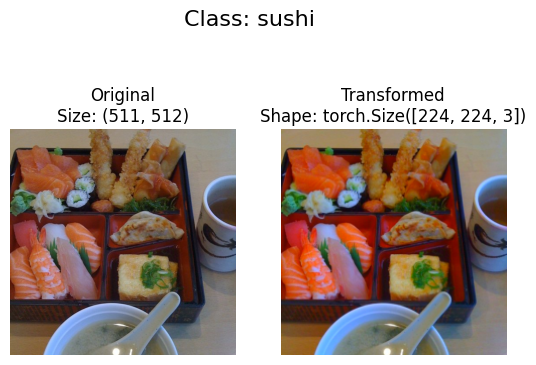

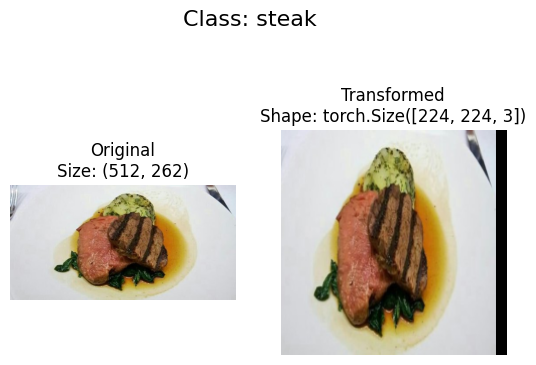

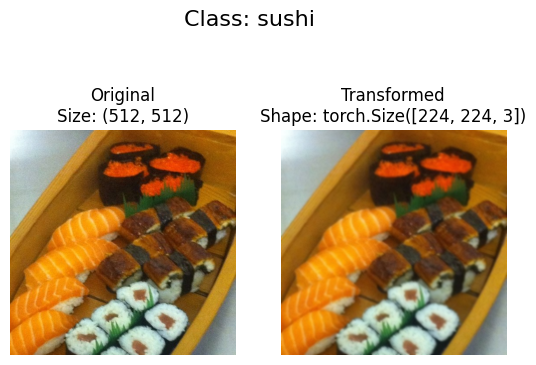

In [ ]:
# Plot transformed images
plot_transformed_images(image_path_list, transform=train_transform, n=3, seed=None)

## 7. Model 0: TinyVGG with out data augmentation

Lets replicate tiny VGG architecture from CNN explainer website.

### 7.1 Creating transforms and loading data for model 0

In [ ]:
# Create simple transform
simple_transform = transforms.Compose([transforms.Resize(size=(64,64)),
                                       transforms.ToTensor()])

In [ ]:
# Load and transform data
from torchvision import datasets
train_data_simple = datasets.ImageFolder(root=train_dir,
                                         transform=simple_transform)

test_data_simple = datasets.ImageFolder(root=test_dir,
                                        transform=simple_transform)

# 2. Turn the datasets into dataloader
import os
from torch.utils.data import DataLoader

# Setup batch size
BATCH_SIZE=32
NUM_WORKERS=os.cpu_count()

train_dataloader = DataLoader(dataset=train_data_simple,
                              batch_size=BATCH_SIZE,
                              num_workers=NUM_WORKERS,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data_simple,
                             batch_size=BATCH_SIZE,
                             shuffle=False,
                             num_workers=NUM_WORKERS)

### 7.2 Copying CNN explainer architecture.

In [ ]:
class TinyVGG(nn.Module):
  """
  Model architecture copying TinyVGG from CNN explainer website
  """
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int) -> None:
    super().__init__()
    self.conv_block1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=0),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                   stride=2)
  )
    self.conv_block2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=0),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                   stride=2)
  )
    self.classifier = nn.Sequential(
           nn.Flatten(),
           nn.Linear(in_features=hidden_units * 13*13,
                     out_features=output_shape)
       )

  def forward(self, x):
    x = self.conv_block1(x)
    # print(x.shape)
    x = self.conv_block2(x)
    # print(x.shape)
    x = self.classifier(x)
    # print(x.shape)
    return x


In [ ]:
torch.manual_seed(42)
# Initialize our model
model_0 = TinyVGG(input_shape=3,
                  hidden_units=10,
                  output_shape=len(class_names)).to(device)

model_0

TinyVGG(
  (conv_block1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

### 7.3 Try a forward pass on a single image(to test the model)

In [ ]:
# Get a single image batch
image_batch, label_batch = next(iter(train_dataloader))
image_batch.shape, label_batch.shape


(torch.Size([32, 3, 64, 64]), torch.Size([32]))

In [ ]:
model_0(image_batch.to(device))

tensor([[ 2.0795e-02, -1.9510e-03,  9.5212e-03],
        [ 1.8440e-02,  2.4668e-03,  6.6609e-03],
        [ 1.7695e-02,  1.0282e-03,  9.4975e-03],
        [ 2.4446e-02, -3.3489e-03,  9.5877e-03],
        [ 1.9939e-02,  6.9131e-04,  1.0778e-02],
        [ 2.1281e-02,  2.0434e-03,  5.0046e-03],
        [ 2.0996e-02,  1.6415e-04,  1.2481e-02],
        [ 2.1566e-02, -1.9607e-03,  9.7175e-03],
        [ 2.4500e-02, -4.7904e-03,  8.5394e-03],
        [ 2.0239e-02, -4.7979e-04,  1.0907e-02],
        [ 2.2219e-02, -4.1816e-04,  9.8173e-03],
        [ 2.2318e-02, -2.1642e-03,  9.4428e-03],
        [ 2.1851e-02, -3.7225e-03,  8.3784e-03],
        [ 2.2881e-02, -1.7559e-03,  1.0299e-02],
        [ 2.1635e-02, -4.3995e-03,  9.4990e-03],
        [ 2.2101e-02, -4.1469e-03,  9.3904e-03],
        [ 2.1226e-02, -4.4215e-03,  1.1476e-02],
        [ 2.1698e-02, -2.7458e-03,  8.4966e-03],
        [ 1.9974e-02, -3.1665e-07,  8.4496e-03],
        [ 1.8308e-02,  1.6378e-03,  8.5491e-03],
        [ 2.0768e-02

### 7.4 Use `torchinfo` to get the shapes from our model

In [ ]:
# Lets get torchinfo
try:
  import torchinfo
except:
  !pip install torchinfo
  import torchinfo

from torchinfo import summary
summary(model_0, input_size=[1,3,64,64])

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [1, 3]                    --
├─Sequential: 1-1                        [1, 10, 30, 30]           --
│    └─Conv2d: 2-1                       [1, 10, 62, 62]           280
│    └─ReLU: 2-2                         [1, 10, 62, 62]           --
│    └─Conv2d: 2-3                       [1, 10, 60, 60]           910
│    └─ReLU: 2-4                         [1, 10, 60, 60]           --
│    └─MaxPool2d: 2-5                    [1, 10, 30, 30]           --
├─Sequential: 1-2                        [1, 10, 13, 13]           --
│    └─Conv2d: 2-6                       [1, 10, 28, 28]           910
│    └─ReLU: 2-7                         [1, 10, 28, 28]           --
│    └─Conv2d: 2-8                       [1, 10, 26, 26]           910
│    └─ReLU: 2-9                         [1, 10, 26, 26]           --
│    └─MaxPool2d: 2-10                   [1, 10, 13, 13]           --
├─Sequentia

### 7.5 Create train and test loops functions

* `train_step()` - takes in a model and dataloader and trains the model on the dataloader.
* `test_step()` - takes in a model and dataloader and evaluates the model on the dataloader

In [ ]:
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer):
    # Put model in train mode
    model.train()

    # Setup train loss and train accuracy values
    train_loss, train_acc = 0, 0

    # Loop through data loader data batches
    for batch, (X, y) in enumerate(dataloader):
        # Send data to target device
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate  and accumulate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Calculate and accumulate accuracy metric across all batches
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item()/len(y_pred)

    # Adjust metrics to get average loss and accuracy per batch
    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)
    return train_loss, train_acc

In [ ]:
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module):
    # Put model in eval mode
    model.eval()

    # Setup test loss and test accuracy values
    test_loss, test_acc = 0, 0

    # Turn on inference context manager
    with torch.inference_mode():
        # Loop through DataLoader batches
        for batch, (X, y) in enumerate(dataloader):
            # Send data to target device
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            test_pred_logits = model(X)

            # 2. Calculate and accumulate loss
            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()

            # Calculate and accumulate accuracy
            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))

    # Adjust metrics to get average loss and accuracy per batch
    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    return test_loss, test_acc

### 7.6 Creating a `train()` function to combine `train_step()` and `test_step()`

In [ ]:
from tqdm.auto import tqdm

# 1. Take in various parameters required for training and test steps
def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5):

    # 2. Create empty results dictionary
    results = {"train_loss": [],
        "train_acc": [],
        "test_loss": [],
        "test_acc": []
    }

    # 3. Loop through training and testing steps for a number of epochs
    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model=model,
                                           dataloader=train_dataloader,
                                           loss_fn=loss_fn,
                                           optimizer=optimizer)
        test_loss, test_acc = test_step(model=model,
            dataloader=test_dataloader,
            loss_fn=loss_fn)

        # 4. Print out what's happening
        print(
            f"Epoch: {epoch+1} | "
            f"train_loss: {train_loss:.4f} | "
            f"train_acc: {train_acc:.4f} | "
            f"test_loss: {test_loss:.4f} | "
            f"test_acc: {test_acc:.4f}"
        )

        # 5. Update results dictionary
        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)

    # 6. Return the filled results at the end of the epochs
    return results

### 7.7 Train and evaluate a model on our train function

In [ ]:
# Set random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set the number of epochs
NUM_EPOCHS = 5

# Recreate an instance of tinyVGG model
model_0 = TinyVGG(input_shape=3, # Number of color channels
                  hidden_units=10, output_shape=len(train_data.classes))

# Setup loss functions and optimizers
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(), lr = 0.001)

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Train model_0
model_0_results = train(model=model_0, train_dataloader=train_dataloader,
                        test_dataloader=test_dataloader, optimizer=optimizer,
                        loss_fn=loss_fn, epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f'Total train time: {end_time - start_time}')


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1063 | train_acc: 0.3047 | test_loss: 1.0983 | test_acc: 0.3011
Epoch: 2 | train_loss: 1.0998 | train_acc: 0.3281 | test_loss: 1.0697 | test_acc: 0.5417
Epoch: 3 | train_loss: 1.0869 | train_acc: 0.4883 | test_loss: 1.0808 | test_acc: 0.4924
Epoch: 4 | train_loss: 1.0842 | train_acc: 0.3984 | test_loss: 1.0608 | test_acc: 0.5833
Epoch: 5 | train_loss: 1.0662 | train_acc: 0.4141 | test_loss: 1.0654 | test_acc: 0.5644
Total train time: 13.914706623


In [ ]:
image, label = next(iter(train_dataloader))
image.shape, label.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

In [ ]:
label

tensor([0, 1, 2, 2, 0, 2, 0, 1, 1, 2, 0, 2, 0, 2, 0, 0, 2, 1, 2, 1, 2, 0, 2, 1,
        0, 2, 0, 1, 2, 1, 0, 2])

In [ ]:
test = model_0(image)
torch.argmax(torch.softmax(test, dim=1), dim=1)

tensor([2, 1, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1,
        2, 1, 2, 1, 2, 1, 2, 2])

### 7.8 Plot the loss curves for model_0

A **loss curve** is a way of tracking your model's progress over time by plotting its loss with the steps / epochs.


In [ ]:
# Get the model_0_results keys
model_0_results.keys()

dict_keys(['train_loss', 'train_acc', 'test_loss', 'test_acc'])

In [ ]:
def plot_loss_curves(results: Dict[str, List[float]]):
  """Plots training curves of a results dictionary"""

  # Get the loss values of the results dictionary(train and test)
  loss = results['train_loss']
  test_loss = results['test_loss']

  # Get the accuracy values of results dictionary(train and test)
  accuracy = results['train_acc']
  test_accuracy = results['test_acc']

  # Figure out how many epochs we have
  epochs = range(len(results['train_loss']))

  # Setup a plot
  plt.figure(figsize=(15, 7))

  # Plot the loss
  plt.subplot(1,2,1)
  plt.plot(epochs, loss, label='loss')
  plt.plot(epochs, test_loss, label='test_loss')
  plt.title('loss')
  plt.xlabel('epochs')
  plt.legend()

  # plot the accuracy
  plt.subplot(1,2,2)
  plt.plot(epochs, accuracy, label='train_accuracy')
  plt.plot(epochs, test_accuracy, label='test_accuracy')
  plt.title('accuracy')
  plt.xlabel('epochs')
  plt.legend()

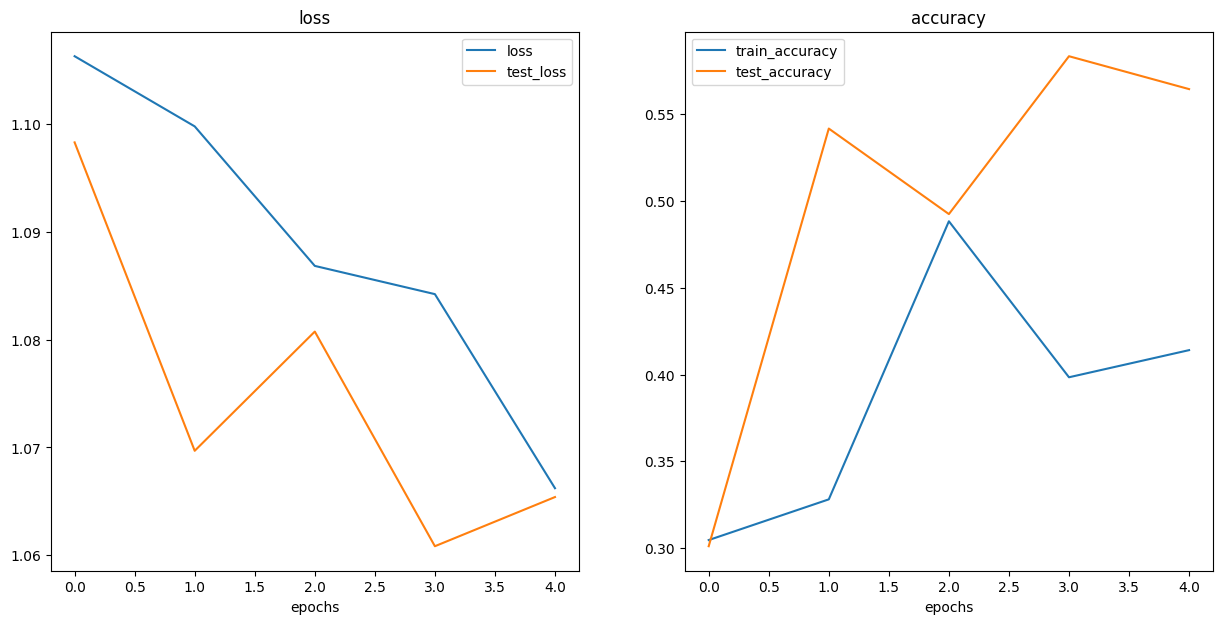

In [ ]:
plot_loss_curves(model_0_results)

From the above loss_curves we can infer that our baseline model is underfitting. this is because it seems that loss on best train and test datasets is not decreasing.

## 9 Model 1: TinyVGG with Data Augmentation
Now lets try another modelling experiment this time using the same model as before with some data augmentation.

### Create transform with data augmentation

In [ ]:
# Create training transforms with TriviailAugment
from torchvision import transforms
train_transform_trivial = transforms.Compose([transforms.Resize(size=(64,64)),
                                               transforms.TrivialAugmentWide(num_magnitude_bins=31),
                                               transforms.ToTensor()])
test_transform_simple = transforms.Compose([transforms.Resize(size=(64,64)),
                                            transforms.ToTensor()])

### Create train and test `Datasets` and `DataLoader's` with data augmentation

In [ ]:
# Turn image folders into Datasets
from torchvision import datasets
train_data_augmented = datasets.ImageFolder(root=train_dir,
                                            transform=train_transform_trivial)

test_data_simple = datasets.ImageFolder(root=test_dir,
                                        transform=test_transform_simple)

In [ ]:
# Turn our Datasets into DataLoaders
import os
from torch.utils.data import dataloader
BATCH_SIZE = 32
NUM_WORKERS=os.cpu_count()

torch.manual_seed(42)
train_dataloader_augmented = DataLoader(dataset=train_data_augmented,
                                        batch_size=BATCH_SIZE,
                                        num_workers=NUM_WORKERS,
                                        shuffle=True)
test_dataloader_simple = DataLoader(dataset=test_data_simple,
                                    batch_size=BATCH_SIZE,
                                    num_workers=NUM_WORKERS,
                                    shuffle=False)

### 9.3 Construct and train model 1
This time we'll be using the same model architecture except this time we've augmented the training data.

In [ ]:
train_data_augmented.classes

['pizza', 'steak', 'sushi']

In [ ]:
# Created model_1 and send it to the device
model_1 = TinyVGG(input_shape=3,
                  hidden_units=10,
                  output_shape=len(train_data_augmented.classes)).to(device)

model_1

TinyVGG(
  (conv_block1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

Wonderful! Now we've a model and dataloaders, let's create loss function and on optimizer and call upon our `train` function to evaluate our model

In [ ]:
# Set random_seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set the number of epochs
NUM_EPOCHS = 5

# Set up loss functions
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_1.parameters(), lr=0.001)

# Start the timer
from timeit import default_timer as timer

start_time = timer()

# Train Model 1
model_1_results = train(model=model_1,
                        train_dataloader=train_dataloader_augmented,
                        test_dataloader=test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS)

# End the timer to see how long it took
end_timer = timer()
print(f'Total training time for model_1: {end_time - start_time:.3f} seconds')

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1049 | train_acc: 0.2500 | test_loss: 1.1019 | test_acc: 0.2604
Epoch: 2 | train_loss: 1.0807 | train_acc: 0.4258 | test_loss: 1.1261 | test_acc: 0.2604
Epoch: 3 | train_loss: 1.0712 | train_acc: 0.4258 | test_loss: 1.1593 | test_acc: 0.2604
Epoch: 4 | train_loss: 1.1253 | train_acc: 0.3047 | test_loss: 1.1581 | test_acc: 0.2604
Epoch: 5 | train_loss: 1.0865 | train_acc: 0.4258 | test_loss: 1.1554 | test_acc: 0.3333
Total training time for model_1: -1079.813 seconds


It seemed from model_ results that our model was underfitting as loss was not going down so weh augmented the data; but it didnt help either.
Remember data augmentation is a way to dal with under-fitting.

In [ ]:
model_1_results

{'train_loss': [1.1049142181873322,
  1.0806865319609642,
  1.0711720064282417,
  1.125308871269226,
  1.0865341275930405],
 'train_acc': [0.25, 0.42578125, 0.42578125, 0.3046875, 0.42578125],
 'test_loss': [1.1019279956817627,
  1.1260557969411213,
  1.159274419148763,
  1.1580669283866882,
  1.1554276545842488],
 'test_acc': [0.2604166666666667,
  0.2604166666666667,
  0.2604166666666667,
  0.2604166666666667,
  0.3333333333333333]}

### 9.4 Plot the loss curves od our model 1
A loss curve helps you evaluate your model overtime and gives you an idea that whether your model is underfitting overfittng.

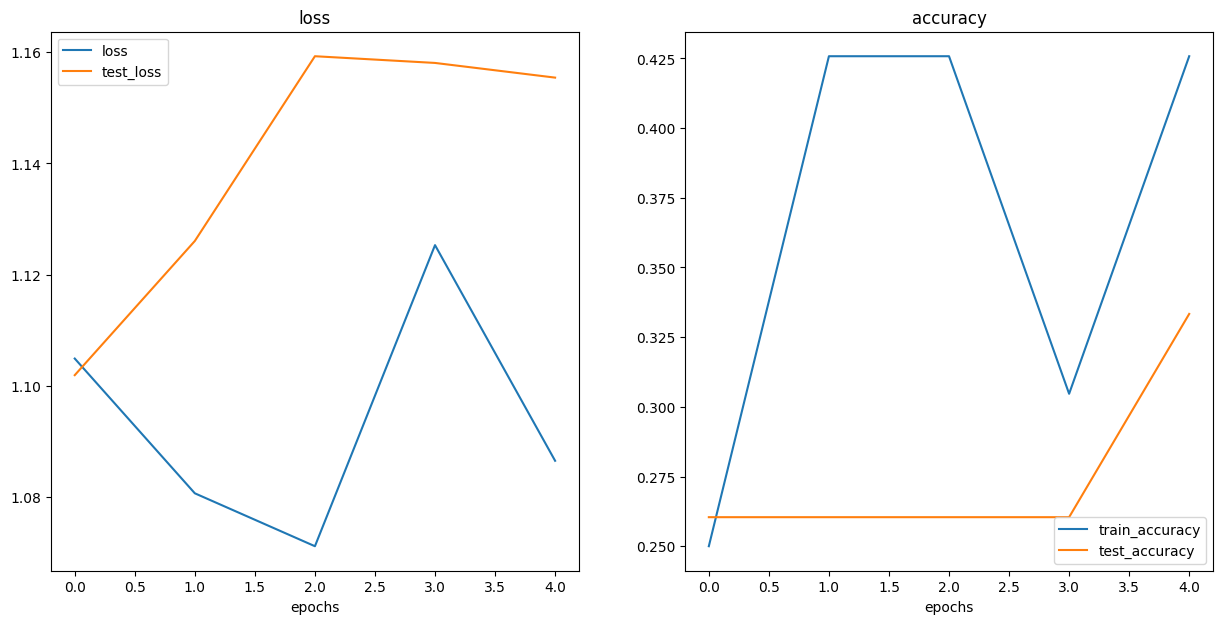

In [ ]:
plot_loss_curves(model_1_results)

 Now it seems that our model is both overfitting and underfitting upto some extents. Now there are a bunch of ways that we can use to deal with over and underfitting which are mentioned in **PyTorch ZTM** book form.
 Infact data augmentation was one of the many ways to deal with underfitting...

## 10. Compare Model Reults

After evaluating our modelling experiments on their own, its important to compare them to each other.

There's a few different ways to do this:

1. Hard coding (what we're doing)
2. PyTorch + TensorBoard
3. Weights & Biases
4. MLflow

In [ ]:
import pandas as pd
model_0_df = pd.DataFrame(model_0_results)
model_1_df = pd.DataFrame(model_1_results)
model_0_df

,train_loss,train_acc,test_loss,test_acc
0,1.106319,0.304688,1.098321,0.301136
1,1.099806,0.328125,1.069690,0.541667
2,1.086854,0.488281,1.080757,0.492424
3,1.084233,0.398438,1.060832,0.583333
4,1.066216,0.414062,1.065396,0.564394


Text(0.5, 0, 'Epochs')

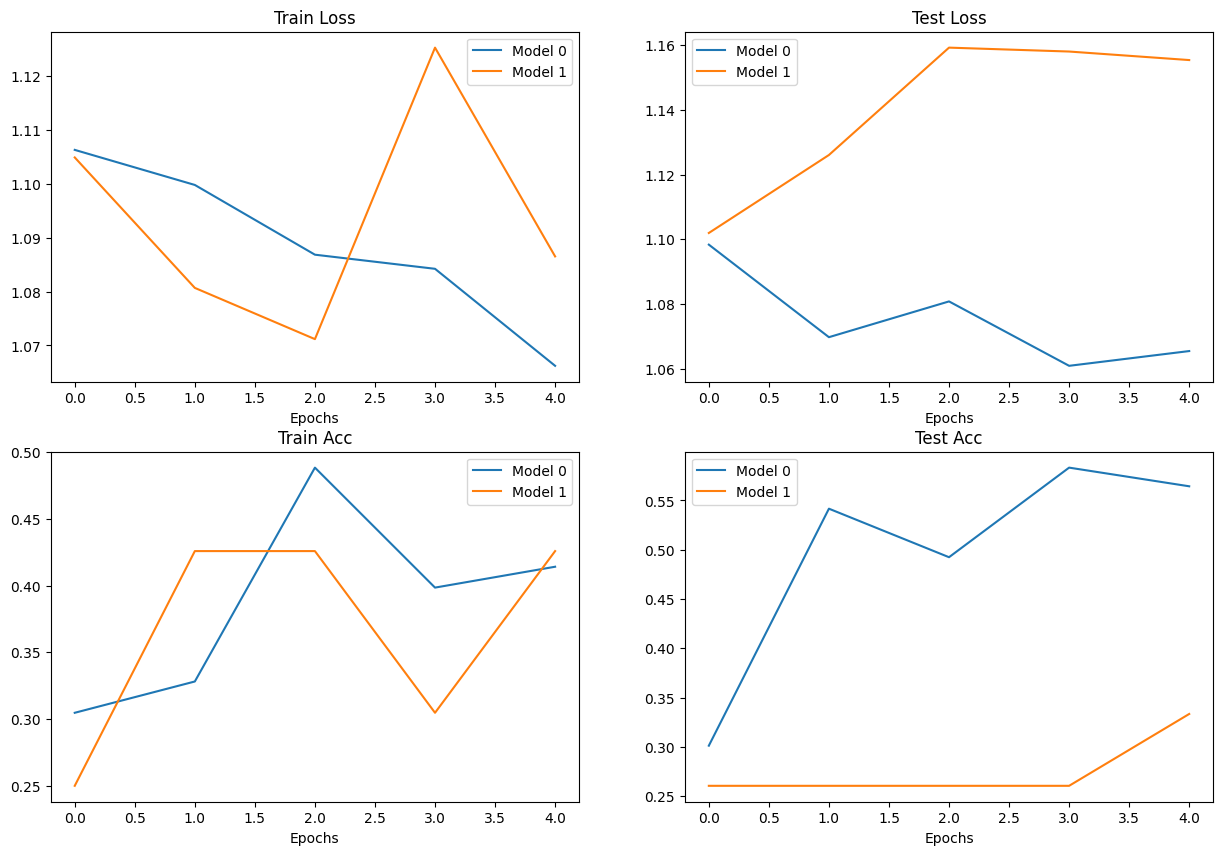

In [ ]:
# Setup a plot
plt.figure(figsize=(15,10))

# Get the number of epochs
epochs = range(len(model_0_df))

# Plot train_loss
plt.subplot(2,2,1)
plt.plot(epochs, model_0_df['train_loss'], label='Model 0')
plt.plot(epochs, model_1_df['train_loss'], label='Model 1')
plt.legend()
plt.title('Train Loss')
plt.xlabel('Epochs')

# Plot test_loss
plt.subplot(2,2,2)
plt.plot(epochs, model_0_df['test_loss'], label='Model 0')
plt.plot(epochs, model_1_df['test_loss'], label='Model 1')
plt.legend()
plt.title('Test Loss')
plt.xlabel('Epochs')

# Plot train accuracy
plt.subplot(2,2,3)
plt.plot(epochs, model_0_df['train_acc'], label='Model 0')
plt.plot(epochs, model_1_df['train_acc'], label='Model 1')
plt.legend()
plt.title('Train Acc')
plt.xlabel('Epochs')

# Plot tets accuracy
plt.subplot(2,2,4)
plt.plot(epochs, model_0_df['test_acc'], label='Model 0')
plt.plot(epochs, model_1_df['test_acc'], label='Model 1')
plt.legend()
plt.title('Test Acc')
plt.xlabel('Epochs')

## 11. Making a predcition on a custom image

Although we have trained our model on custom data.. how do you make a prediction on a sample/image that not either in train or test data set.

In [ ]:
data_path

PosixPath('data')

In [ ]:
# Download custom image
import requests

# Setup custom image path
custom_image_path = data_path / "04-pizza-dad.jpeg"

# Download the image if it doesn't already exist
if not custom_image_path.is_file():
    with open(custom_image_path, "wb") as f:
        # When downloading from GitHub, need to use the "raw" file link
        request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/04-pizza-dad.jpeg")

        print(f"Downloading {custom_image_path}...")
        f.write(request.content)
else:
    print(f"{custom_image_path} already exists, skipping download.")

### 11.1 Loading in a custom image with PyTorch

We have to make sure our custom image is in the same format as the data our model was trained on.

* In tensor form with datatype (torch.float32)
* of shape 64x64x3
* On the right device

We can read an image using Pytorch `read_image()`

In [ ]:

custom_image_path.exists()

True

In [ ]:
import torchvision
import PIL

# Read in custom image
custom_image_uint8 = torchvision.io.read_image(str(custom_image_path))

print(f'Custom Image tensor:\n {custom_image_uint8}')
print(f'Custom Image shape: {custom_image_uint8.shape}')
print(f'Custom Image datatype: {custom_image_uint8.dtype}')



Custom Image tensor:
 tensor([[[154, 173, 181,  ...,  21,  18,  14],
         [146, 165, 181,  ...,  21,  18,  15],
         [124, 146, 172,  ...,  18,  17,  15],
         ...,
         [ 72,  59,  45,  ..., 152, 150, 148],
         [ 64,  55,  41,  ..., 150, 147, 144],
         [ 64,  60,  46,  ..., 149, 146, 143]],

        [[171, 190, 193,  ...,  22,  19,  15],
         [163, 182, 193,  ...,  22,  19,  16],
         [141, 163, 184,  ...,  19,  18,  16],
         ...,
         [ 55,  42,  28,  ..., 107, 104, 103],
         [ 47,  38,  24,  ..., 108, 104, 102],
         [ 47,  43,  29,  ..., 107, 104, 101]],

        [[119, 138, 147,  ...,  17,  14,  10],
         [111, 130, 145,  ...,  17,  14,  11],
         [ 87, 111, 136,  ...,  14,  13,  11],
         ...,
         [ 35,  22,   8,  ...,  52,  52,  48],
         [ 27,  18,   4,  ...,  50,  49,  44],
         [ 27,  23,   9,  ...,  49,  46,  43]]], dtype=torch.uint8)
Custom Image shape: torch.Size([3, 4032, 3024])
Custom Image data

The datatype of custom image is uint8 because thats what the read_image funcion returns to us.

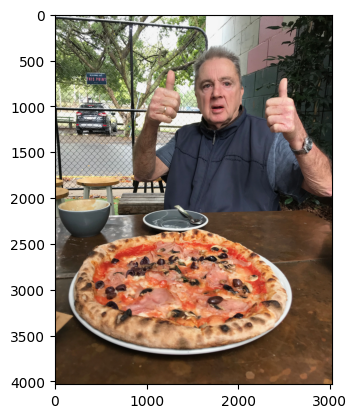

In [ ]:
plt.imshow(custom_image_uint8.permute(1,2,0));

### 11.2 Making a predcition on custom image with a trained PyTorch model

In [ ]:
# Trying to make a prediction on an image in uint8 format
model_1.eval()
with torch.inference_mode():
  model_1(custom_image_uint8.to(device))

RuntimeError: ignored

In [ ]:
# We get this error as its a type mismatch between whats our model is trained on and the images dtype
# So lets alter the shape of our custom_image
custom_image = torchvision.io.read_image(str(custom_image_path)).type(torch.float) / 255
custom_image

tensor([[[0.6039, 0.6784, 0.7098,  ..., 0.0824, 0.0706, 0.0549],
         [0.5725, 0.6471, 0.7098,  ..., 0.0824, 0.0706, 0.0588],
         [0.4863, 0.5725, 0.6745,  ..., 0.0706, 0.0667, 0.0588],
         ...,
         [0.2824, 0.2314, 0.1765,  ..., 0.5961, 0.5882, 0.5804],
         [0.2510, 0.2157, 0.1608,  ..., 0.5882, 0.5765, 0.5647],
         [0.2510, 0.2353, 0.1804,  ..., 0.5843, 0.5725, 0.5608]],

        [[0.6706, 0.7451, 0.7569,  ..., 0.0863, 0.0745, 0.0588],
         [0.6392, 0.7137, 0.7569,  ..., 0.0863, 0.0745, 0.0627],
         [0.5529, 0.6392, 0.7216,  ..., 0.0745, 0.0706, 0.0627],
         ...,
         [0.2157, 0.1647, 0.1098,  ..., 0.4196, 0.4078, 0.4039],
         [0.1843, 0.1490, 0.0941,  ..., 0.4235, 0.4078, 0.4000],
         [0.1843, 0.1686, 0.1137,  ..., 0.4196, 0.4078, 0.3961]],

        [[0.4667, 0.5412, 0.5765,  ..., 0.0667, 0.0549, 0.0392],
         [0.4353, 0.5098, 0.5686,  ..., 0.0667, 0.0549, 0.0431],
         [0.3412, 0.4353, 0.5333,  ..., 0.0549, 0.0510, 0.

In [ ]:
custom_image.shape

torch.Size([3, 4032, 3024])

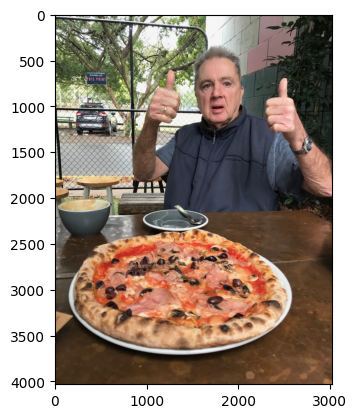

In [ ]:
plt.imshow(custom_image.permute(1,2,0));

In [ ]:
# Lets try our image with our model now since we have changed the dtype
model_0.eval()
with torch.inference_mode():
  model_0(custom_image)

RuntimeError: ignored

Wooohoo now we get a shape error for matrix multiplication for our model's classifier layer

In [ ]:
# Create transform pipeline to resize image
from torchvision import transforms
custom_image_transform = transforms.Compose([transforms.Resize(size=(64,64))])

custom_image_transformed = custom_image_transform(custom_image)

# Print out the shapes
print(f'Original Shape: {custom_image.shape}')
print(f'Transformed shape: {custom_image_transformed.shape}')

Original Shape: torch.Size([3, 4032, 3024])
Transformed shape: torch.Size([3, 64, 64])


/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


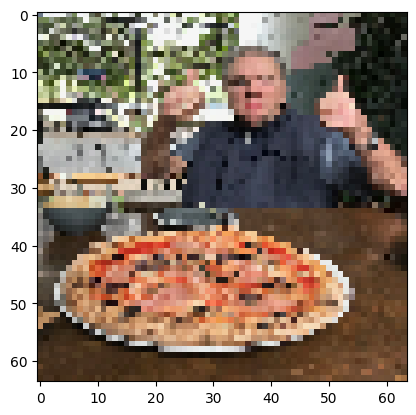

In [ ]:
plt.imshow(custom_image_transformed.permute(1,2,0))

In [ ]:
# This will error because of device and / or lacking batch dimension
model_1.eval()
with torch.inference_mode():
  pred = model_1(custom_image_transformed)

pred

RuntimeError: ignored

In [ ]:
custom_image_transformed.shape, custom_image_transformed.unsqueeze(0).shape

(torch.Size([3, 64, 64]), torch.Size([1, 3, 64, 64]))

In [ ]:
# This should work now !!! (added a batch size)
model_1.eval()
with torch.inference_mode():
  custom_image_pred = model_1(custom_image_transformed.unsqueeze(0).to(device))

custom_image_pred

tensor([[ 0.0662,  0.0545, -0.2034]])

Note to make a prediction on a custom image we had to:
* Load the image and turn it into a tensor
* Make sure the image was the same datatype as the model (torch.float32)
* Make sure the data is of the same shape as your model was trained on.
* The custom data and model must be on the same device.

In [ ]:
class_names

['pizza', 'steak', 'sushi']

In [ ]:
custom_image_pred_probs = torch.softmax(custom_image_pred, dim=1)
custom_image_pred_probs

tensor([[0.3634, 0.3591, 0.2775]])

In [ ]:
# Convert our custom_image_pred_probs into predction labels
custom_image_pred_labels = torch.argmax(custom_image_pred_probs, dim=1)
custom_image_pred_labels

tensor([0])

In [ ]:
class_names[custom_image_pred_labels]

'pizza'

### 11.3 Putting custo image prediction together into a function

Ideal outcome:
A function where we pass an image path to and have our model predict on that image and plot the image + prediction

In [ ]:
def pred_and_plot_image(model: torch.nn.Module,
                        image_path: str,
                        class_names: List[str] = None,
                        transform = None,
                        device = device):
  """
  Makes a prediction on a target image with a trained model
  """
  # Load in the image
  target_image = torchvision.io.read_image(str(image_path)).type(torch.float32)

  # Divide the image pixel values by 255 to get them between [0,1]
  target_image = target_image / 255

  # Transform if necessary
  if transform:
    target_image = transform(target_image)

  # Make sure the model is on the target device
  model.to(device)

  # Turn on eval/inference mode and make a prediction
  model.eval()
  with torch.inference_mode():
    # Add an extra dimension to the image (this is the batch dimension we need as we are providing single image)
    target_image = target_image.unsqueeze(0)

    # Make a prediction on the image with an extra dimension
    target_image_pred = model(target_image.to(device)) # Make sure the target image is on the same device as our model.

  # Convert logits into prediction probabilities
  target_image_pred_probs = torch.softmax(target_image_pred, dim=1)

  # Convert prediction probabilities into prediction labels
  target_image_pred_label = torch.argmax(target_image_pred_probs, dim=1)

  # Plot the image alongside the prediction and prediction probability
  plt.imshow(target_image.squeeze().permute(1,2,0)) # Removing the previously added batch dimension
  if class_names:
    title = f'Pred: {class_names[target_image_pred_label.cpu()]} | Prob: {target_image_pred_probs.max().cpu():.3f}'
  else:
    title = f'Pred: {target_image_pred_label} | Prob: {target_image_pred_probs.max().cpu():.3f}'

  plt.title(title)
  plt.axis(False)

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


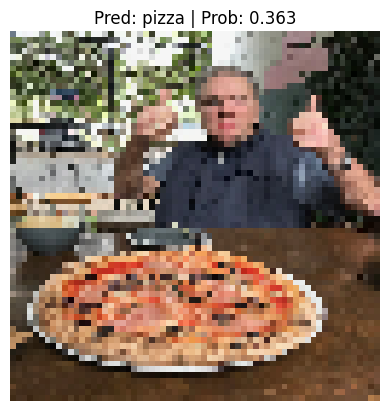

In [ ]:
# Pred on our custom image
pred_and_plot_image(model=model_1,
                    image_path=custom_image_path,
                    class_names=class_names,
                    transform=custom_image_transform,
                    device=device)